In [2]:
import torch
import torchvision
import torch.nn as tn
import matplotlib.pyplot as plt
import torchvision.transforms as tt
import torch.utils as utils


In [4]:
train_data = torchvision.datasets.MNIST('./data',download=True)
test_data = torchvision.datasets.MNIST('data',train=False)
print(train_data)
print(test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test


In [5]:
print(train_data[0])

(<PIL.Image.Image image mode=L size=28x28 at 0x7FC7993691F0>, 5)


Text(0.5, 1.0, 'Label of Image:0')

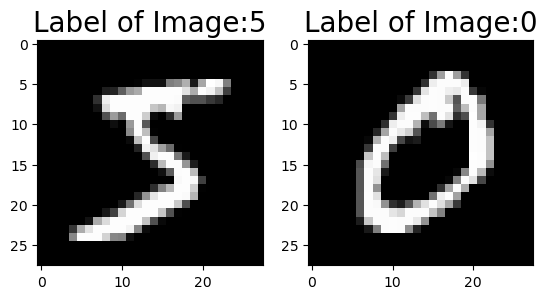

In [6]:
import matplotlib.pyplot as plt
  
plt.subplot(1,2,1)
image, label = train_data[0]
plt.imshow(image, cmap='gray')
plt.title("Label of Image:{}".format(label),fontsize=20)
plt.subplot(1,2,2)
image, label = train_data[1]
plt.imshow(image, cmap='gray')
plt.title("Label of Image:{}".format(label),fontsize=20)

In [7]:
train_data = torchvision.datasets.MNIST('data',train=True,transform=tt.ToTensor())
test_data = torchvision.datasets.MNIST('data',train=False,transform=tt.ToTensor())

In [21]:
input_size = 28*28  #Size of image

num_classes = 10  #the image number are in range 0-10

num_epochs = 5 #one cycle through the full train data
batch_size = 100 
learning_rate = 0.001

In [22]:
train_dataLoader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,shuffle=True)
test_dataLoader = torch.utils.data.DataLoader(test_data,batch_size=batch_size,shuffle=False)

In [23]:
class LogisticRegression(tn.Module):
    def __init__(self,input_size,num_classes):
        super(LogisticRegression,self).__init__()
        self.linear = tn.Linear(input_size,num_classes)
    
    def forward(self,feature):
        output = self.linear(feature)
        return output


In [24]:
model = LogisticRegression(input_size,num_classes)
loss = tn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [25]:
run = 0
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_dataLoader):
        images = torch.autograd.Variable(images.view(-1,input_size))
        labels = torch.autograd.Variable(labels)
        
        # Nullify gradients w.r.t. parameters
        optimizer.zero_grad()
        #forward propagation
        output = model(images)
        # compute loss based on obtained value and actual label
        compute_loss = loss(output,labels)
        # backward propagation
        compute_loss.backward()
        # update the parameters
        optimizer.step()
        run+=1
        
        if (i+1)%200 == 0:
            # check total accuracy of predicted value and actual label
            accurate = 0
            total = 0
            for images,labels in test_dataLoader:
                images = torch.autograd.Variable(images.view(-1,input_size))
                output = model(images)
                _,predicted = torch.max(output.data, 1)
                # total labels
                total+= labels.size(0)
                
                # Total correct predictions
                accurate+= (predicted == labels).sum()
                accuracy_score = 100 * accurate/total
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(run, compute_loss.item(), accuracy_score))

print('Final Accuracy:',accuracy_score)

Iteration: 200. Loss: 2.0810210704803467. Accuracy: 42.470001220703125
Iteration: 400. Loss: 1.9481942653656006. Accuracy: 64.9800033569336
Iteration: 600. Loss: 1.8211406469345093. Accuracy: 71.87000274658203
Iteration: 800. Loss: 1.5810142755508423. Accuracy: 75.73999786376953
Iteration: 1000. Loss: 1.5454171895980835. Accuracy: 77.2699966430664
Iteration: 1200. Loss: 1.4683994054794312. Accuracy: 78.80000305175781
Iteration: 1400. Loss: 1.4862114191055298. Accuracy: 79.63999938964844
Iteration: 1600. Loss: 1.3123196363449097. Accuracy: 80.80999755859375
Iteration: 1800. Loss: 1.257443904876709. Accuracy: 81.44999694824219
Iteration: 2000. Loss: 1.2304590940475464. Accuracy: 81.88999938964844
Iteration: 2200. Loss: 1.087600827217102. Accuracy: 82.18000030517578
Iteration: 2400. Loss: 1.0905207395553589. Accuracy: 82.52999877929688
Iteration: 2600. Loss: 1.0932586193084717. Accuracy: 82.91000366210938
Iteration: 2800. Loss: 1.0618783235549927. Accuracy: 83.05000305175781
Iteration: 30